In [19]:
# Python program for implementation
# of Ford Fulkerson algorithm
from collections import defaultdict

# This class represents a directed graph
# using adjacency matrix representation
class Graph:

	def __init__(self, graph):
		self.graph = graph # residual graph
		self. ROW = len(graph)
		# self.COL = len(gr[0])

	'''Returns true if there is a path from source 's' to sink 't' in
	residual graph. Also fills parent[] to store the path '''

	def BFS(self, s, t, parent):

		# Mark all the vertices as not visited
		visited = [False]*(self.ROW)

		# Create a queue for BFS
		queue = []

		# Mark the source node as visited and enqueue it
		queue.append(s)
		visited[s] = True

		# Standard BFS Loop
		while queue:

			# Dequeue a vertex from queue and print it
			u = queue.pop(0)

			# Get all adjacent vertices of the dequeued vertex u
			# If a adjacent has not been visited, then mark it
			# visited and enqueue it
			for ind, val in enumerate(self.graph[u]):
				if visited[ind] == False and val > 0:
					# If we find a connection to the sink node,
					# then there is no point in BFS anymore
					# We just have to set its parent and can return true
					queue.append(ind)
					visited[ind] = True
					parent[ind] = u
					if ind == t:
						return True

		# We didn't reach sink in BFS starting
		# from source, so return false
		return False


	# Returns the maximum flow from s to t in the given graph
	def FordFulkerson(self, source, sink):

		# This array is filled by BFS and to store path
		parent = [-1]*(self.ROW)

		max_flow = 0 # There is no flow initially

		# Augment the flow while there is path from source to sink
		while self.BFS(source, sink, parent) :

			# Find minimum residual capacity of the edges along the
			# path filled by BFS. Or we can say find the maximum flow
			# through the path found.
			path_flow = float("Inf")
			s = sink
			while(s != source):
				path_flow = min (path_flow, self.graph[parent[s]][s])
				s = parent[s]

			# Add path flow to overall flow
			max_flow += path_flow

			# update residual capacities of the edges and reverse edges
			# along the path
			v = sink
			while(v != source):
				u = parent[v]
				self.graph[u][v] -= path_flow
				self.graph[v][u] += path_flow
				v = parent[v]

		return max_flow


# Create a graph given in the above diagram

graph = [[0, 16, 13, 0, 0, 0],
		[0, 0, 10, 12, 0, 0],
		[0, 4, 0, 0, 14, 0],
		[0, 0, 9, 0, 0, 20],
		[0, 0, 0, 7, 0, 4],
		[0, 0, 0, 0, 0, 0]]

g = Graph(graph)

source = 0; sink = 5

print ("The maximum possible flow is %d " % g.FordFulkerson(source, sink))

# This code is contributed by Neelam Yadav


The maximum possible flow is 23 


In [14]:
!pip install PySimpleGUI


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.7/512.7 kB 14.0 MB/s eta 0:00:00


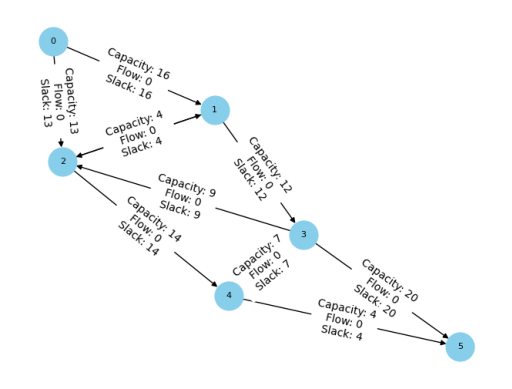

The maximum possible flow is 23


In [34]:
import networkx as nx
import matplotlib.pyplot as plt
import tempfile
import shutil
import matplotlib.image as mpimg
from collections import defaultdict

class Graph:

	def __init__(self, graph):
		self.graph = graph
		self. ROW = len(graph)


	def BFS(self, s, t, parent):

		visited = [False]*(self.ROW)

		queue = []

		queue.append(s)
		visited[s] = True

		while queue:

			u = queue.pop(0)

			for ind, val in enumerate(self.graph[u]):
				if visited[ind] == False and val > 0:

					queue.append(ind)
					visited[ind] = True
					parent[ind] = u
					if ind == t:
						return True

		return False


	def FordFulkerson(self, source, sink):

		parent = [-1]*(self.ROW)

		max_flow = 0

		while self.BFS(source, sink, parent) :

			path_flow = float("Inf")
			s = sink
			while(s != source):
				path_flow = min (path_flow, self.graph[parent[s]][s])
				s = parent[s]

			max_flow += path_flow

			v = sink
			while(v != source):
				u = parent[v]
				self.graph[u][v] -= path_flow
				self.graph[v][u] += path_flow
				v = parent[v]

		return max_flow



graph = [[0, 16, 13, 0, 0, 0],
		[0, 0, 10, 12, 0, 0],
		[0, 4, 0, 0, 14, 0],
		[0, 0, 9, 0, 0, 20],
		[0, 0, 0, 7, 0, 4],
		[0, 0, 0, 0, 0, 0]]

g = Graph(graph)

source = 0; sink = 5


# Visualization using NetworkX and Matplotlib
G = nx.DiGraph()
for i in range(len(graph)):
    for j in range(len(graph[i])):
        if graph[i][j] != 0:
            G.add_edge(i, j, capacity=graph[i][j], flow=0)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black")
labels = {(i, j): f'Capacity: {attr["capacity"]}\nFlow: {attr["flow"]}\nSlack: {attr["capacity"] - attr["flow"]}' for i, j, attr in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.title('Flow Network')

# Save the graph as an image
image_path = tempfile.mktemp(suffix='.png')
plt.savefig(image_path)
plt.close()

# Load the saved image and display it
img = mpimg.imread(image_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

# Calculate and display the maximum flow
max_flow = g.FordFulkerson(source, sink)
print(f"The maximum possible flow is {max_flow}")

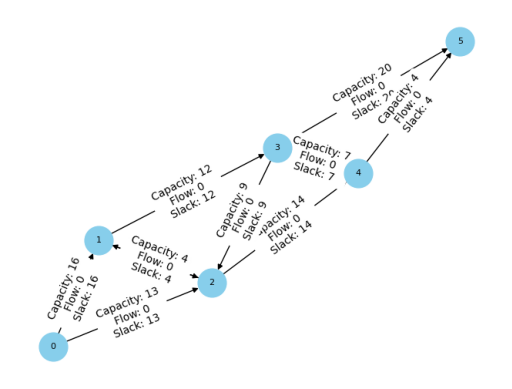

The maximum possible flow is 23


In [36]:
import networkx as nx
import matplotlib.pyplot as plt
import tempfile
import shutil
import matplotlib.image as mpimg
from collections import defaultdict

class Graph:

    def __init__(self, graph):
        self.graph = graph
        self.ROW = len(graph)

    def BFS(self, s, t, parent):
        visited = [False] * (self.ROW)
        queue = []
        queue.append(s)
        visited[s] = True

        while queue:
            u = queue.pop(0)
            for ind, val in enumerate(self.graph[u]):
                if visited[ind] == False and val > 0:
                    queue.append(ind)
                    visited[ind] = True
                    parent[ind] = u
                    if ind == t:
                        return True
        return False

    def FordFulkerson(self, source, sink):
        parent = [-1] * (self.ROW)
        max_flow = 0

        while self.BFS(source, sink, parent):
            path_flow = float("Inf")
            s = sink
            while s != source:
                path_flow = min(path_flow, self.graph[parent[s]][s])
                s = parent[s]

            max_flow += path_flow

            v = sink
            while v != source:
                u = parent[v]
                self.graph[u][v] -= path_flow
                self.graph[v][u] += path_flow
                v = parent[v]

        return max_flow


graph = [[0, 16, 13, 0, 0, 0],
        [0, 0, 10, 12, 0, 0],
        [0, 4, 0, 0, 14, 0],
        [0, 0, 9, 0, 0, 20],
        [0, 0, 0, 7, 0, 4],
        [0, 0, 0, 0, 0, 0]]

g = Graph(graph)

source = 0
sink = 5

# Visualization using NetworkX and Matplotlib
G = nx.DiGraph()
for i in range(len(graph)):
    for j in range(len(graph[i])):
        if graph[i][j] != 0:
            G.add_edge(i, j, capacity=graph[i][j], flow=0)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black")

# Calculate and display the maximum flow
max_flow = g.FordFulkerson(source, sink)

# Update the labels after Ford-Fulkerson
labels = {(i, j): f'Capacity: {attr["capacity"]}\nFlow: {attr["flow"]}\nSlack: {attr["capacity"] - attr["flow"]}' for i, j, attr in G.edges(data=True)}

nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Flow Network')

# Save the graph as an image
image_path = tempfile.mktemp(suffix='.png')
plt.savefig(image_path)
plt.close()

# Load the saved image and display it
img = mpimg.imread(image_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

print(f"The maximum possible flow is {max_flow}")


**Dijkstra Algorithm**

Distance of  a  from source vertex:  0
Distance of  b  from source vertex:  3
Distance of  c  from source vertex:  1
Distance of  d  from source vertex:  2
Distance of  e  from source vertex:  4
Distance of  f  from source vertex:  4
Distance of  g  from source vertex:  3


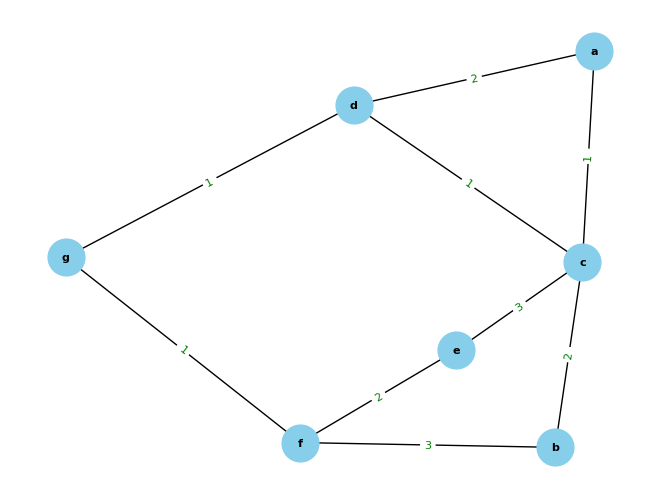

In [49]:
# Dijkstra's Algorithm in Python

import networkx as nx
import matplotlib.pyplot as plt

import sys

# Providing the graph
vertices = [[0, 0, 1, 1, 0, 0, 0],
            [0, 0, 1, 0, 0, 1, 0],
            [1, 1, 0, 1, 1, 0, 0],
            [1, 0, 1, 0, 0, 0, 1],
            [0, 0, 1, 0, 0, 1, 0],
            [0, 1, 0, 0, 1, 0, 1],
            [0, 0, 0, 1, 0, 1, 0]]

edges = [[0, 0, 1, 2, 0, 0, 0],
         [0, 0, 2, 0, 0, 3, 0],
         [1, 2, 0, 1, 3, 0, 0],
         [2, 0, 1, 0, 0, 0, 1],
         [0, 0, 3, 0, 0, 2, 0],
         [0, 3, 0, 0, 2, 0, 1],
         [0, 0, 0, 1, 0, 1, 0]]



# Find which vertex is to be visited next
def to_be_visited():
    global visited_and_distance
    v = -10
    for index in range(num_of_vertices):
        if visited_and_distance[index][0] == 0 \
            and (v < 0 or visited_and_distance[index][1] <=
                 visited_and_distance[v][1]):
            v = index
    return v


num_of_vertices = len(vertices[0])

visited_and_distance = [[0, 0]]
for i in range(num_of_vertices-1):
    visited_and_distance.append([0, sys.maxsize])

for vertex in range(num_of_vertices):

    to_visit = to_be_visited()
    for neighbor_index in range(num_of_vertices):

        if vertices[to_visit][neighbor_index] == 1 and \
                visited_and_distance[neighbor_index][0] == 0:
            new_distance = visited_and_distance[to_visit][1] \
                + edges[to_visit][neighbor_index]
            if visited_and_distance[neighbor_index][1] > new_distance:
                visited_and_distance[neighbor_index][1] = new_distance

        visited_and_distance[to_visit][0] = 1

i = 0

for distance in visited_and_distance:
    print("Distance of ", chr(ord('a') + i),
          " from source vertex: ", distance[1])
    i = i + 1

G = nx.Graph()

for i in range(num_of_vertices):
    G.add_node(chr(ord('a') + i))

for i in range(num_of_vertices):
    for j in range(num_of_vertices):
        if vertices[i][j] == 1:
            G.add_edge(chr(ord('a') + i), chr(ord('a') + j), weight=edges[i][j])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_size=8)

edge_labels = {(chr(ord('a') + i), chr(ord('a') + j)): edges[i][j] for i in range(num_of_vertices) for j in range(num_of_vertices) if vertices[i][j] == 1}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='green', font_size=8)

plt.show()

**Prim's Algorithm**

Minimum Spanning Tree:
(None, 'A', 0)
('A', 'B', 2)
('B', 'C', 1)
('B', 'D', 3)
Total Minimum Weight: 6


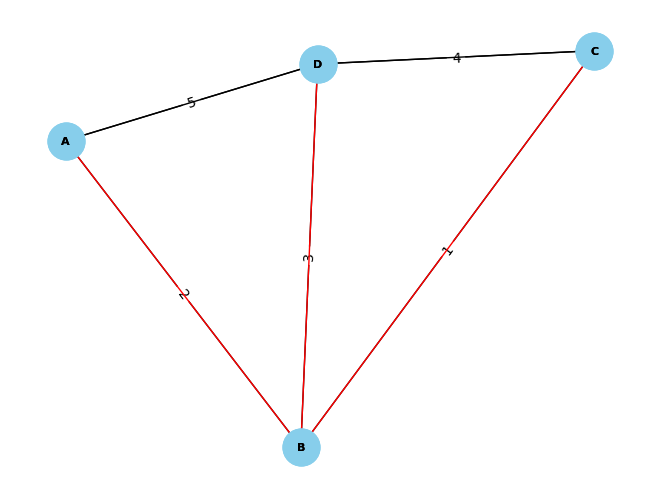

In [55]:
import heapq
import matplotlib.pyplot as plt
import networkx as nx

def prim(graph):
    # Initialize variables
    visited = set()
    min_spanning_tree = []
    total_weight = 0
    start_vertex = list(graph.keys())[0]

    # Priority queue to store edges with their weights
    priority_queue = [(0, start_vertex, None)]

    while priority_queue:
        weight, current_vertex, previous_vertex = heapq.heappop(priority_queue)

        if current_vertex not in visited:
            visited.add(current_vertex)
            min_spanning_tree.append((previous_vertex, current_vertex, weight))
            total_weight += weight

            for neighbor, edge_weight in graph[current_vertex].items():
                if neighbor not in visited:
                    heapq.heappush(priority_queue, (edge_weight, neighbor, current_vertex))

    return min_spanning_tree, total_weight

def plot_graph(graph, min_spanning_tree):
    G = nx.Graph()

    for vertex in graph:
        G.add_node(vertex)

    for vertex in graph:
        for neighbor, weight in graph[vertex].items():
            G.add_edge(vertex, neighbor, weight=weight)

    pos = nx.spring_layout(G)  # Change layout if needed

    # Plot original graph
    nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=8)

    # Highlight edges in minimum spanning tree
    min_tree_edges = [(edge[0], edge[1]) for edge in min_spanning_tree if edge[0] is not None]
    edge_colors = ['red' if edge in min_tree_edges else 'black' for edge in G.edges]
    edge_labels = {(u, v): G[u][v]['weight'] for u, v in G.edges if 'weight' in G[u][v]}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=8, edge_color=edge_colors)

    plt.show()

# Example usage
graph = {
    'A': {'B': 2, 'D': 5},
    'B': {'A': 2, 'C': 1, 'D': 3},
    'C': {'B': 1, 'D': 4},
    'D': {'A': 5, 'B': 3, 'C': 4}
}

minimum_spanning_tree, total_minimum_weight = prim(graph)

print("Minimum Spanning Tree:")
for edge in minimum_spanning_tree:
    print(edge)

print("Total Minimum Weight:", total_minimum_weight)

plot_graph(graph, minimum_spanning_tree)


**Max Flow Algorithm**

In [58]:
from collections import defaultdict

class Graph:
    def __init__(self, graph):
        self.graph = graph
        self.ROW = len(graph)

    def bfs(self, s, t, parent):
        visited = [False] * (self.ROW)
        queue = []
        queue.append(s)
        visited[s] = True

        while queue:
            u = queue.pop(0)

            for ind, val in enumerate(self.graph[u]):
                if visited[ind] == False and val > 0:
                    queue.append(ind)
                    visited[ind] = True
                    parent[ind] = u

        return True if visited[t] else False

    def ford_fulkerson(self, source, sink):
        parent = [-1] * (self.ROW)
        max_flow = 0

        while self.bfs(source, sink, parent):
            path_flow = float("Inf")
            s = sink
            while(s != source):
                path_flow = min(path_flow, self.graph[parent[s]][s])
                s = parent[s]

            max_flow += path_flow

            v = sink
            while(v != source):
                u = parent[v]
                self.graph[u][v] -= path_flow
                self.graph[v][u] += path_flow
                v = parent[v]

        return max_flow

# Example Usage:
graph = [[0, 1, 13, 0, 0, 0],
         [0, 0, 10, 12, 0, 0],
         [0, 4, 0, 0, 14, 0],
         [0, 0, 9, 0, 0, 20],
         [0, 0, 0, 7, 0, 4],
         [0, 0, 0, 0, 0, 0]]

g = Graph(graph)
source, sink = 0, 5
print("Max Flow:", g.ford_fulkerson(source, sink))



Max Flow: 14
